Q1

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 20 10:17:30 2025

@author: ACER
"""
import numpy as np

x = np.array([[0.5, 1.2, -0.3],
              [-1.5, 2.3, 0.8],
              [1.0, -0.5, 2.0],
              [-0.3, 0.8, -1.2]])

y = np.array([1, 0, 1, 0])

w = np.array([0.0, 0.0, 0.0])
b = 0
learning_rate = 0.01
iterations = 10
m = len(x)

def predict(w,x,b):
    return np.dot(x,w) + b

for _ in range(iterations):
    for i in range(m):
        y_pred = predict(w, x[i], b)
        error = y[i] - y_pred

        w += learning_rate * error * x[i]
        b += learning_rate * error

        loss = np.mean((y-y_pred)**2)
print(w)
print(b)
print(loss)

[0.13482653 0.04402681 0.11510731]
0.1521800197186168
0.49096941580259046


Q2

In [1]:
import numpy as np

# Sigmoid activation and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Input and target
X = np.array([[0, 3.5], [1, 2], [1, 0.5]])
y = np.array([[1], [1], [0]])

# Given weights and biases
hidden_weights = np.array([[0.5, 0.1, -0.3], [0.7, -0.3, 0.2]])  # shape (2, 3)
hidden_bias = np.array([[0.4, 0.1, -0.1]])                        # shape (1, 3)

output_weights = np.array([[0.8], [0.1], [-0.1]])                 # shape (3, 1)
output_bias = np.array([[0.2]])                                   # shape (1, 1)

# Forward propagation
hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
output_layer_output = sigmoid(output_layer_input)

print("Predicted Output (Before Training):")
print(output_layer_output)


Predicted Output (Before Training):
[[0.71495607]
 [0.71447795]
 [0.6964678 ]]


Q3

In [6]:
# Sigmoid derivative function
def sigmoid_derivative(x):
    return x * (1 - x)

# Hyperparameters
learning_rate = 0.1
epochs = 500

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, output_weights) + output_bias
    output_output = sigmoid(output_input)

    # Loss computation (Mean Squared Error)
    loss = np.mean(np.square(y - output_output))

    # Backpropagation
    output_error = y - output_output
    output_gradient = output_error * sigmoid_derivative(output_output)

    hidden_error = np.dot(output_gradient, output_weights.T)
    hidden_gradient = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights and biases
    output_weights += learning_rate * np.dot(hidden_output.T, output_gradient)
    output_bias += learning_rate * np.sum(output_gradient)

    hidden_weights += learning_rate * np.dot(X.T, hidden_gradient)
    hidden_bias += learning_rate * np.sum(hidden_gradient)

    # Print loss every 100 iterations
    if epoch % 100 == 0:
        print(epoch,loss)

# Final output after training
print("\nPredicted Output (After Training):")
print(output_output)


0 0.003932894675824798
100 0.003657324752262922
200 0.003414985921901991
300 0.0032004086599153325
400 0.0030092398651017133

Predicted Output (After Training):
[[0.97977087]
 [0.94141416]
 [0.06839062]]


Q4

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 20 12:00:31 2025

@author: ACER
"""
import numpy as np

x = np.array([1, 2, 3])
y_true = np.array([6, 7, 8])

w = 0
b = 0
learning_rate = 0.01
iterations = 200
m = len(x)

for i in range(iterations):
    y_pred = w * x + b

    w_gradient = -(2/m) * np.sum(x * (y_true - y_pred))
    b_gradient = -(2/m) * np.sum(y_true - y_pred)

    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    loss = np.mean((y_true - y_pred) ** 2)

    if i % 100 == 0:
        print(loss)

print(f"Final slope (w): {w}")
print(f"Final intercept (b): {b}")
print(f"Final MSE: {loss}")

49.666666666666664
1.294073454418992
Final slope (w): 2.038599994504364
Final intercept (b): 2.6390180894548103
Final MSE: 0.8035173691272984


Q5


Final parameters: 1.97078250602932 0.06641823135781669


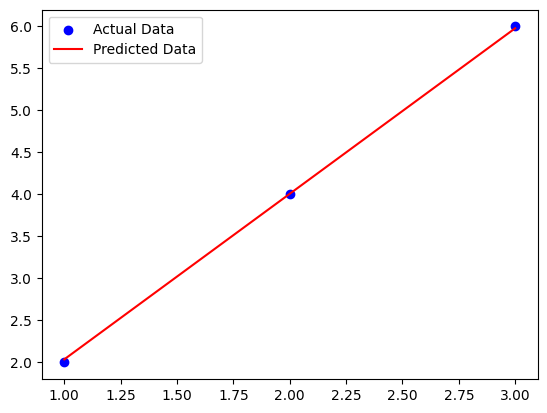

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1,2,3])
y = np.array([2,4,6])

# Initialize parameters
w, b = 0, 0
learning_rate = 0.01
iterations = 1000  # Increased iterations

# Gradient Descent
for i in range(iterations):
    y_pred = w * x + b
    error = y - y_pred
    grad_w = -2 * np.dot(x, error) / len(x)
    grad_b = -2 * np.sum(error) / len(x)
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

print("\nFinal parameters:", w, b)

# Plot
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, w * x + b, color='red', label='Predicted Data')
plt.legend()
plt.show()


Q6

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 20 12:28:42 2025

@author: ACER
"""
import numpy as np

def softmax(z):
    exp = np.exp(z)
    return exp/np.sum(exp)

z = np.array([2.5,1.2,-0.8])

p = softmax(z)

print(p)


[0.76369984 0.20813249 0.02816767]


Q7

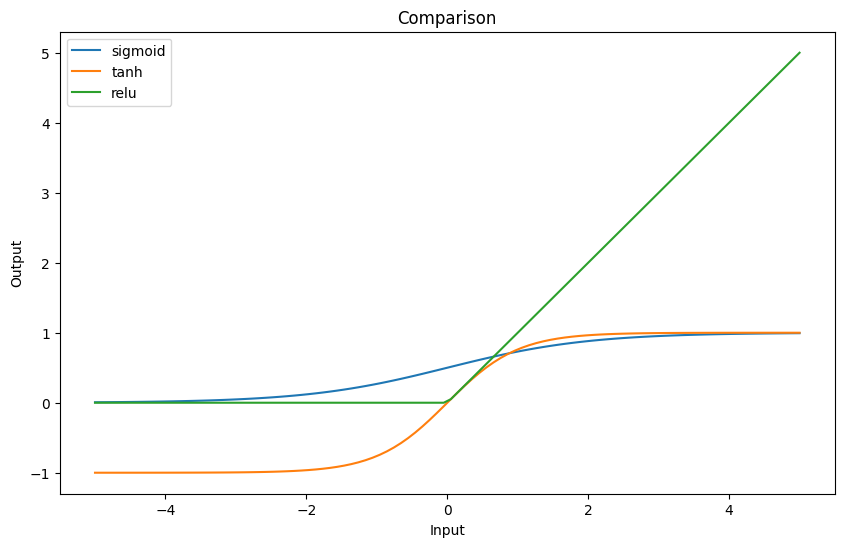

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 20 12:37:06 2025

@author: ACER
"""
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu_func(x):
    return np.maximum(0,x)

x = np.linspace(-5,5,100)

plt.figure(figsize=(10,6))
plt.plot(x,sigmoid(x),label='sigmoid')
plt.plot(x,tanh(x),label='tanh')
plt.plot(x,relu_func(x),label='relu')
plt.title("Comparison")
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

Q8

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 26 08:11:46 2025

@author: ACER
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,accuracy_score

#load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#One hot encode the target labels
y = LabelBinarizer().fit_transform(y)
#print(y)

#split the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Build the MLP model with sigmoid activation fucntion and SGD optimizer
def create_mlp(activation_func,optimizer):
    model = Sequential() # Sequential model refers to a type of neural network model where labels are
    # Its a simple nd straight forward way to build models, particulary for feedforward networks.
    model.add(Dense(64,input_dim = X_train.shape[1],activation=activation_func))
    #model.add(): This is used to add layers to the neural network model.Each add() function adds a layer
    #This creates a dense (fully connected) layer with 64 units (neurons) in the hidden layer.
    #A dense layer means that each neuron in the layer is connected to every neuron in previous layer.
    #input_dim = X_train.shape[1]: This specifies the shape of the input data that the layer expects.
    #The input_dim parameter indicates the number of features in each input sample
    #X_train.shape[1]: This represents the number of features in the input data (i.e. the number)

    model.add(Dense(3,activation='softmax'))  #Output layer(3 classes)

    #Compile the model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics = ['accuracy'])      #loss calculation k liye isme hum categorical crossentropy ka use kiye
    return model

#MLP with sigmoid activation and SGD optimizer
mlp_sigmoid_sgd = create_mlp('sigmoid',SGD())
mlp_sigmoid_sgd.fit(X_train,y_train,epochs=300,batch_size = 10,verbose=0)     #epochs=300 means 300 iterations
#Batch Size: It is the number of training examples (data samples) utilized in one iteration of model training
#The verbose parameter is used to specify how much infomation should be displayed in the console while the training of the model is going on

# Evaluate the model
y_pred_sigmoid_sgd = mlp_sigmoid_sgd.predict(X_test)  # Use predict() instead of direct call
y_pred_sigmoid_sgd_classes = y_pred_sigmoid_sgd.argmax(axis=1)

# Print the classification report and test accuracy for Sigmoid+SGD
print("Classification Report (Sigmoid+SGD):\n", classification_report(y_test.argmax(axis=1), y_pred_sigmoid_sgd_classes))
test_accuracy_sigmoid_sgd = accuracy_score(y_test.argmax(axis=1), y_pred_sigmoid_sgd_classes)
print("Test Accuracy (Sigmoid + SGD): {:.2f}%".format(test_accuracy_sigmoid_sgd * 100))


#MLP with Relu activation and SGD optimizer
mlp_relu_sgd = create_mlp('relu',SGD())
mlp_relu_sgd.fit(X_train,y_train,epochs=100,batch_size=10,verbose=0)

#Evaluate the model with test data
y_pred_relu_sgd = mlp_relu_sgd.predict(X_test)
y_pred_relu_sgd_classes = y_pred_relu_sgd.argmax(axis=1)

#Print the classification report and test accuracy for RELU+SGD
print("Classification Report (RELU+SGD):\n", classification_report(y_test.argmax(axis=1), y_pred_relu_sgd_classes))
test_accuracy_relu_sgd = accuracy_score(y_test.argmax(axis=1), y_pred_relu_sgd_classes)
print("Test Accuracy (RELU + SGD): {:.2f}%".format(test_accuracy_relu_sgd * 100))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Classification Report (Sigmoid+SGD):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Test Accuracy (Sigmoid + SGD): 100.00%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classification Report (RELU+SGD):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Test Accuracy (RELU + SGD): 97.78%


Q9

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Evaluation of MLP with SGD optimizer:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1405
Test Accuracy (SGD): 96.19%


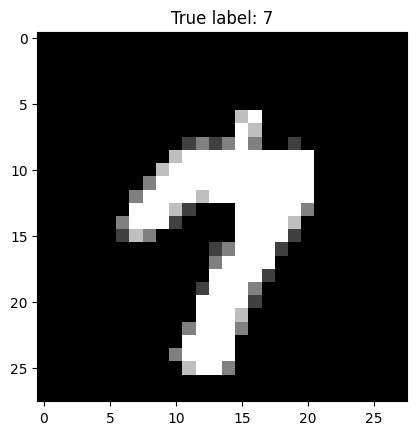

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report (SGD):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.93      0.97      0.95       892
           6       0.95      0.97      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 26 09:33:11 2025

@author: ACER
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

#load the mnist datasets
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#normalize the pixel value to range[0,1]
X_train = X_train/255.0
X_test = X_test/255.0

#Convert the labels to one-hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#Define the MLP model with two hidden layers
def create_mlp_model(optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    # This flatten layer in keras is used to convert the multi-dimentional input into a one-dimentional vector
    #This is necessary because the fully connected layers(Eg: Dense Layers) expect input as a one-dimention
    #The flatten layer takes the input, regardless of its shape and flattens it into a single vector(1D)
    #Flatten input images into 1D vector
    model.add(Dense(128,activation='relu'))     #first hidden layer with 128 neurons
    model.add(Dense(64,activation='relu'))      #second hidden layer with 64 neurons
    model.add(Dense(10,activation='softmax'))   #output layer with 10 neurons

    #Compile the model with the chosen optimizer
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

# Train the model using SGD optimizer
mlp_SGD = create_mlp_model(SGD())
history_sgd = mlp_SGD.fit(X_train,y_train,epochs=10,batch_size=32,validation_data = (X_test,y_test),verbose=0)

#Evaluate the model performance using the test data
print("\nEvaluation of MLP with SGD optimizer:")
test_loss_sgd,test_acc_sgd = mlp_SGD.evaluate(X_test,y_test) #evaluate() function returns two values: the
print(f"Test Accuracy (SGD): {test_acc_sgd *100:.2f}%")

# Predict a random image from the test set
random_index = np.random.randint(0,X_test.shape[0])
random_image = X_test[random_index]
random_label = np.argmax(y_test[random_index])

#Display the image
plt.imshow(random_image,cmap='gray')
plt.title(f"True label: {random_label}")
plt.show()

#Generate the classification report
y_pred_sgd = np.argmax(mlp_SGD.predict(X_test),axis=1)

print("\nClassification Report (SGD):\n",classification_report(np.argmax(y_test,axis=1), y_pred_sgd))

Q10

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 26 10:20:21 2025
@author: ACER
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

df = pd.read_csv('healthcare.csv')

print(df.head(5))

df = df.drop(columns=['id'])

categorical_cols = ['gender', 'smoking_status','ever_married','work_type','Residence_type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

scaler = StandardScaler()
numerical_cols = ['age', 'bmi','avg_glucose_level']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X,y = make_classification(n_samples=4500,n_features=10,n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_one(optimizer):
    model = Sequential([
        Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def model_two(optimizer):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_sgd1 = model_one(SGD())
history_sgd1 = mlp_sgd1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

mlp_sgd2 = model_two(SGD())
history_sgd2 = mlp_sgd2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

print("\nEvaluation of Model 1 (SGD optimizer):")
test_loss_sgd1, test_acc_sgd1 = mlp_sgd1.evaluate(X_test, y_test)
print(f"Test Accuracy (SGD - Model 1): {test_acc_sgd1 * 100:.2f}%")

print("\nEvaluation of Model 2 (SGD optimizer):")
test_loss_sgd2, test_acc_sgd2 = mlp_sgd2.evaluate(X_test, y_test)
print(f"Test Accuracy (SGD - Model 2): {test_acc_sgd2 * 100:.2f}%")

y_pred_sgd1 = np.argmax(mlp_sgd1.predict(X_test),axis=1)
y_pred_sgd2 = np.argmax(mlp_sgd2.predict(X_test),axis=1)

print("\nClassification Report (SGD - Model 1):\n", classification_report(y_test, y_pred_sgd1))
print("\nClassification Report (SGD - Model 2):\n", classification_report(y_test, y_pred_sgd2))



      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Evaluation of Model 1 (SGD optimizer):
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.3078 
Test Accuracy (SGD - Model 1): 90.67%

Evaluation of Model 2 (SGD optimizer):
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9039 - loss: 0.2170 
Test Accuracy (SGD - Model 2): 91.44%
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report (SGD - Model 1):
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       453
           1       0.00      0.00      0.00       447

    accuracy                           0.50       900
   macro avg       0.25      0.50      0.33       900
weighted avg       0.25      0.50      0.34       900


Classification Report (SGD - Model 2):
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       453
           1       0.00      0.00      0.00       447

    accuracy                           0.50  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m